### Load and explore the dataset

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset
car_df = pd.read_csv('cars.csv')

In [3]:
#  Get the column information
car_df.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

Remove the space in the column names

In [4]:
car_df.columns.str.replace(' ','')

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [5]:
car_df.columns=['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand']

### Explore the Dataset

In [6]:
car_df.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [7]:
car_df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


### Sort the data according to the 'brand'

In [8]:
#car_df = car_df.sort_values(by=['brand'])

In [9]:
brand_list = car_df['brand']
brand_name = list(set(brand_list))
print(f'brand names are: {brand_name}')
brand_c ={' US.':0, ' Japan.':1,' Europe.':2}
print(brand_c)

brand names are: [' Japan.', ' US.', ' Europe.']
{' US.': 0, ' Japan.': 1, ' Europe.': 2}


## Add brand index to the dataframe

In [10]:
brand_value = [2,1,0] # Europe =2, US. = 0, Japan =1
brand_index = np.zeros(brand_list.shape)

In [11]:
index = 0
# print(brand_value)
# print(brand_name)
for item in brand_list:
    brand_index[index]=brand_c[item]
# #     print(item)
#     if item == brand_name[0]:#Europe
#         brand_index[index] = brand_value[0]
#     elif item == brand_name[1]: # US
#         brand_index[index] =brand_value[1]
#     else:# Japan
#         brand_index[index] =brand_value[2]
# #     print(brand_index[index])

    index +=1
# print(brand_index)

In [12]:
# print(brand_list)

In [13]:
car_df['brand_index']=brand_index

In [14]:
print(car_df[['brand','brand_index']])

        brand  brand_index
0         US.          0.0
1     Europe.          2.0
2         US.          0.0
3         US.          0.0
4         US.          0.0
5         US.          0.0
6         US.          0.0
7         US.          0.0
8     Europe.          2.0
9      Japan.          1.0
10     Japan.          1.0
11    Europe.          2.0
12        US.          0.0
13        US.          0.0
14        US.          0.0
15        US.          0.0
16     Japan.          1.0
17        US.          0.0
18     Japan.          1.0
19    Europe.          2.0
20     Japan.          1.0
21    Europe.          2.0
22        US.          0.0
23        US.          0.0
24     Japan.          1.0
25     Japan.          1.0
26     Japan.          1.0
27        US.          0.0
28        US.          0.0
29        US.          0.0
..        ...          ...
231       US.          0.0
232       US.          0.0
233       US.          0.0
234   Europe.          2.0
235   Europe.          2.0
2

### Get the data

In [15]:
# car_data_df = car_df[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
#        'year','brand_index']]
car_data_df = car_df[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year','brand_index']]

In [16]:
car_data_df.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand_index'],
      dtype='object')

### Get the feature

In [17]:
car_model_df = car_df['brand']

In [18]:
print(f'car data shape    = {car_data_df.shape}')
print(f'car feature shape  = {car_model_df.shape}')
print(f'car data name    = {list(car_data_df.columns)}')
print(f'car feature name  = {car_model_df.name}')

car data shape    = (261, 8)
car feature shape  = (261,)
car data name    = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year', 'brand_index']
car feature name  = brand


In [19]:
# Get the total brand numbers
brand_number = len(np.unique(car_model_df.values))
print(f'car brand numbers: {brand_number}')

car brand numbers: 3


### Convert dataframe to array, convert str to data type and fill null to do the predication

In [20]:
# Because initial value has string, convert the data to numeric for KMeans
car_data_df = car_data_df.convert_objects(convert_numeric=True)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [21]:
# Eliminating null values for KMeans input

for i in car_data_df.columns:
    car_df[i] = car_data_df[i].fillna(int(car_data_df[i].mean()))
    car_data_df[i]= car_data_df[i].fillna(int(car_data_df[i].mean()))


### Visulize the dataset

In [22]:
%matplotlib inline
import seaborn as sns

sns.set(font_scale=1.1)
sns.set_style('whitegrid')

#grid = sns.pairplot(car_df)

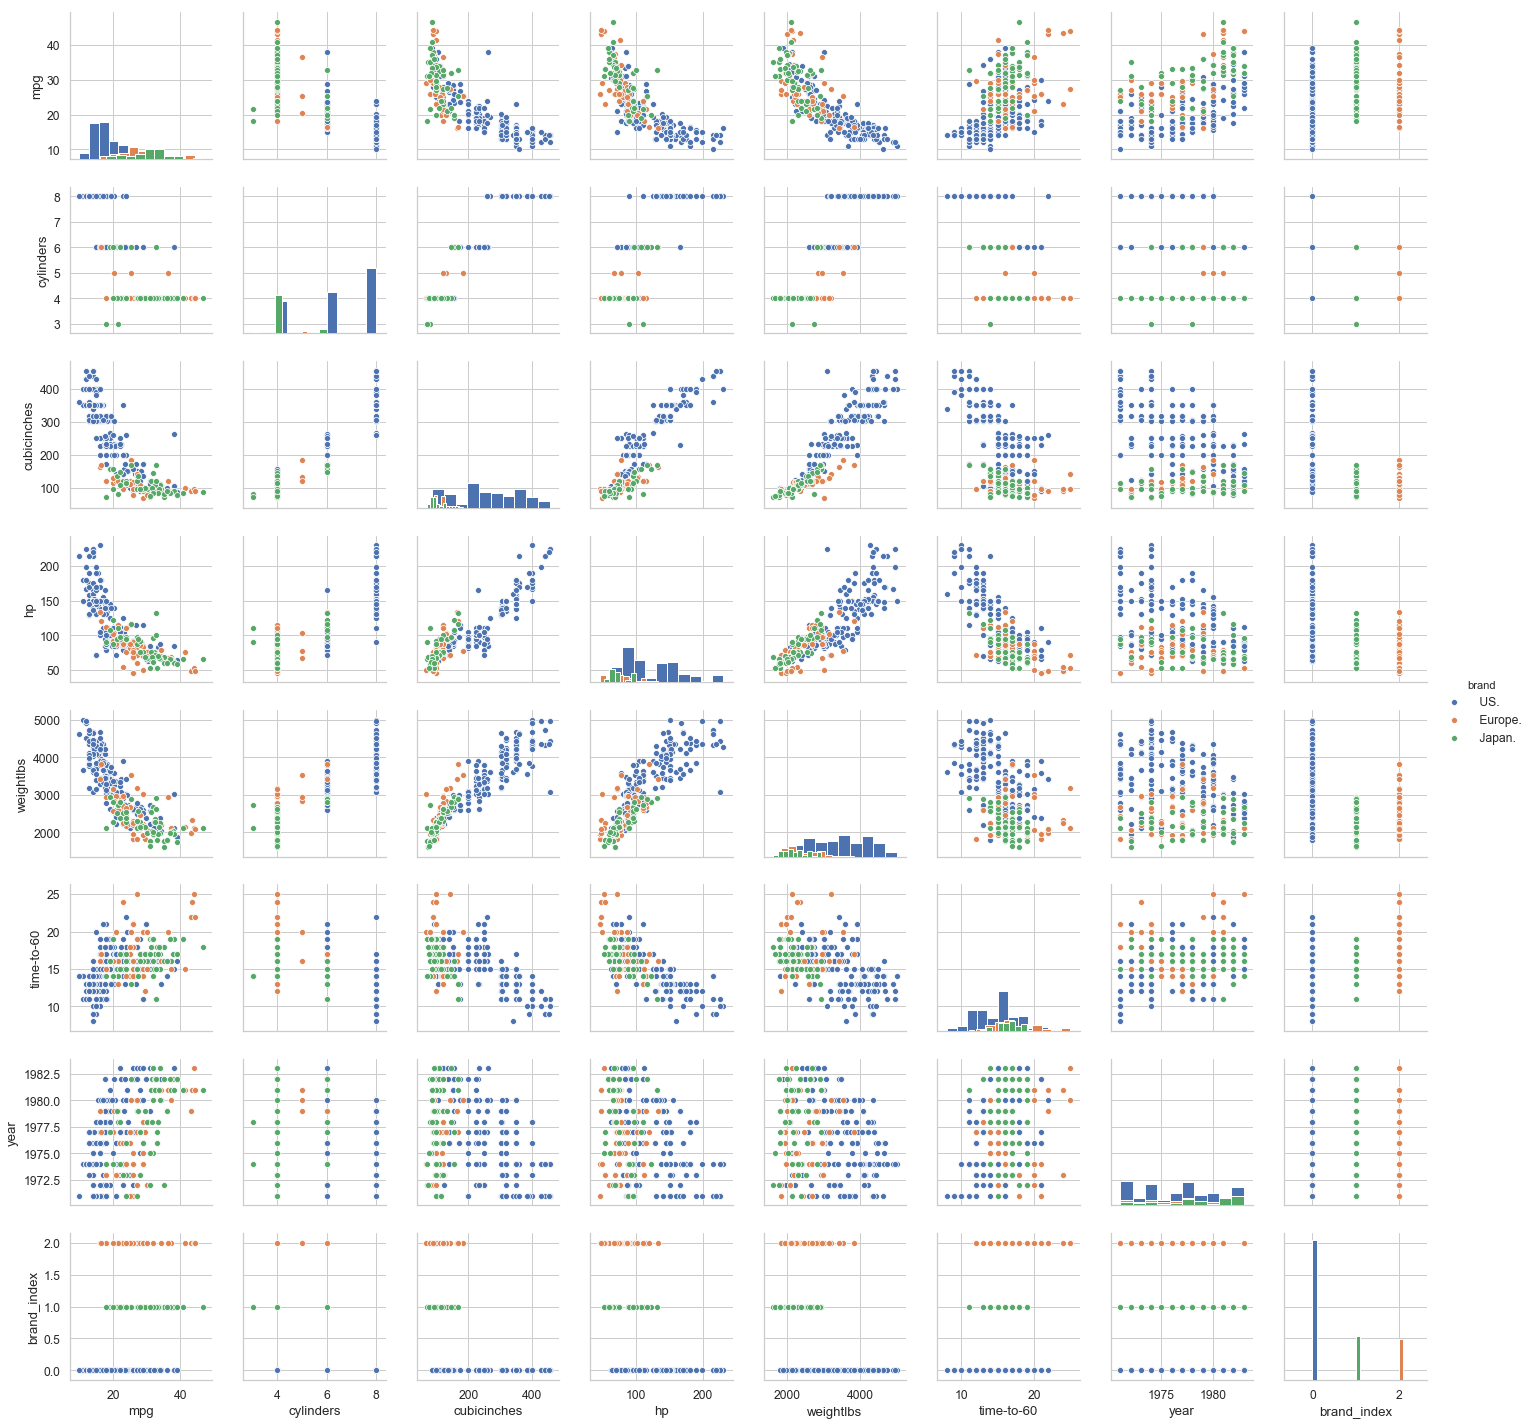

In [23]:
grid = sns.pairplot(car_df, hue = 'brand',diag_kind='hist')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


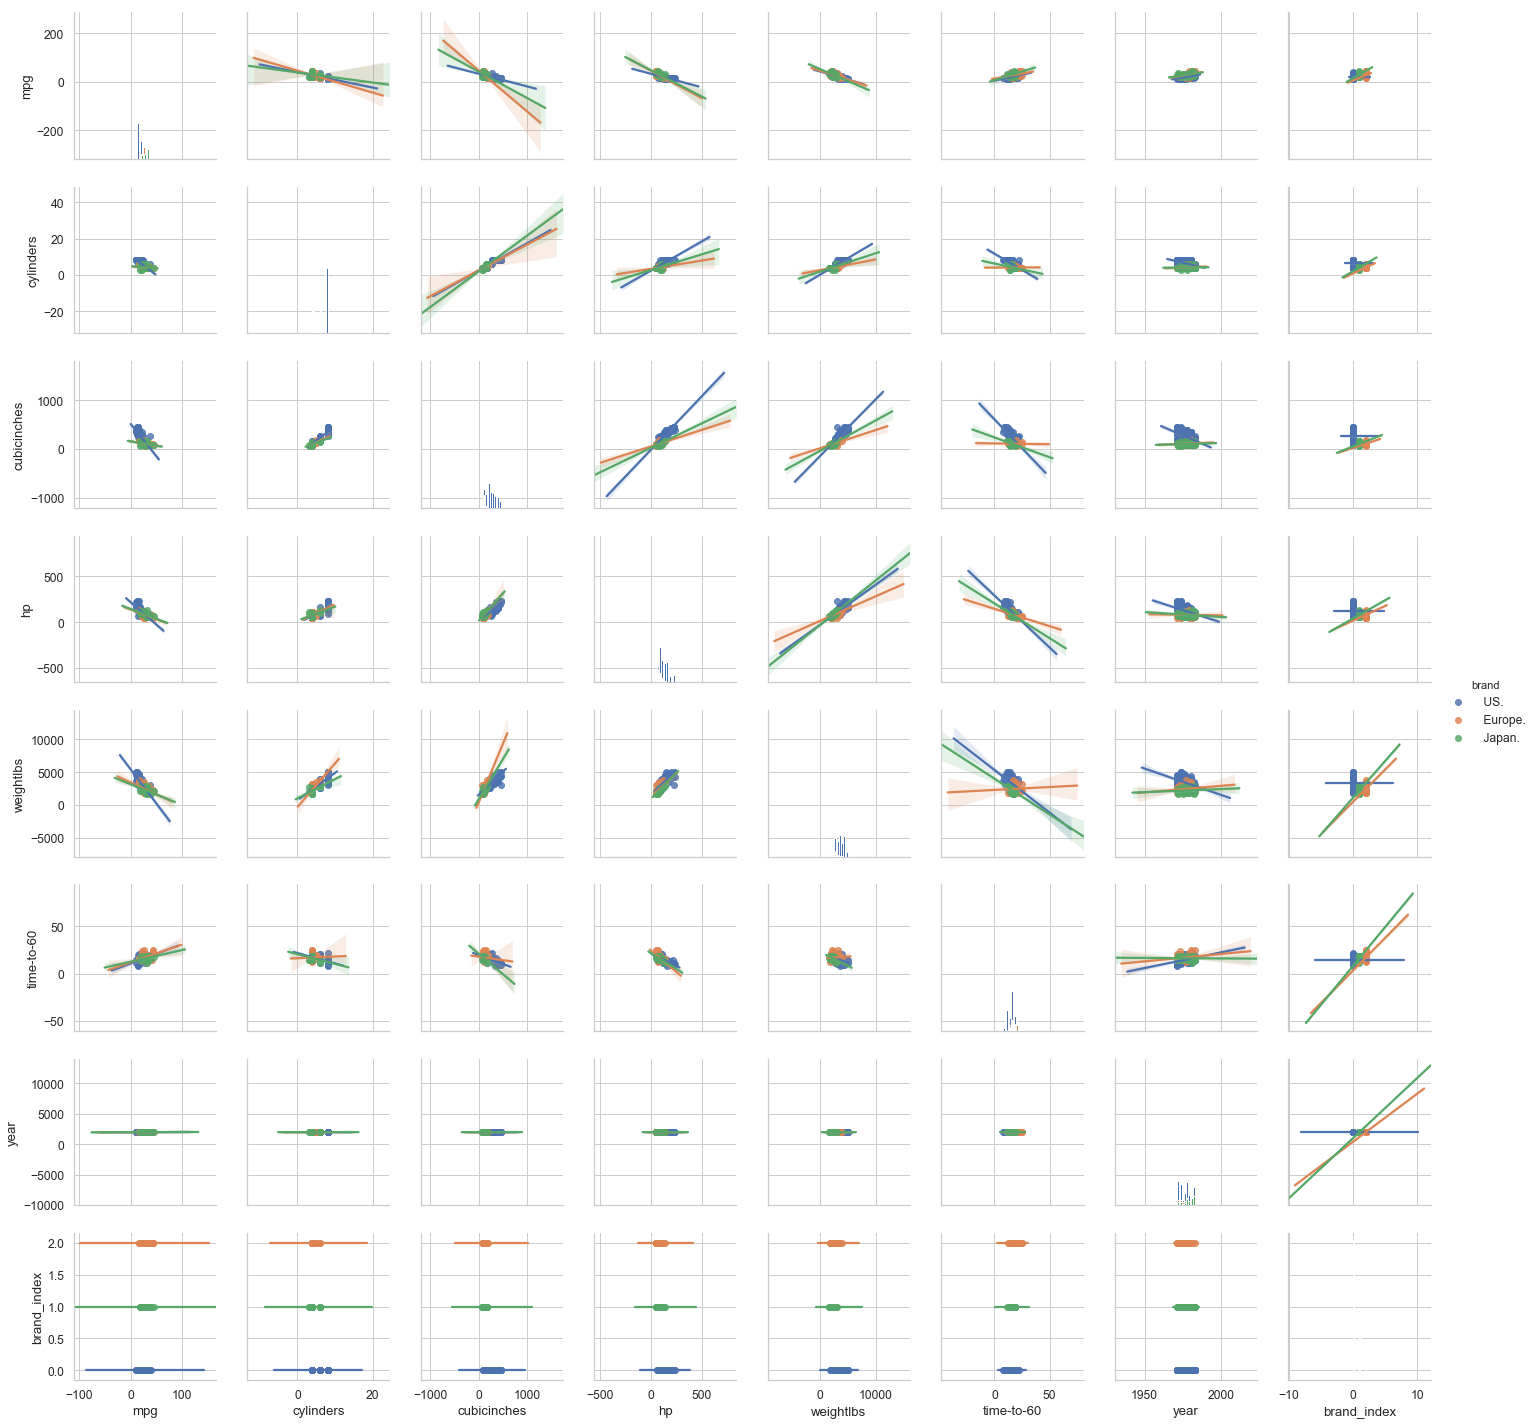

In [24]:
grid = sns.pairplot(car_df, hue = 'brand',kind='reg',diag_kind = 'hist')

In [25]:
from sklearn.cluster import KMeans

input_value = car_data_df.values[:,:-1]

kmeans = KMeans(n_clusters=3, random_state=11, n_init=500)  # find three clusters
y_kmeans = kmeans.fit(input_value)
y_kmeans_2 = kmeans.fit_predict(input_value)
y_k3 = kmeans.predict(input_value)


In [26]:
input_value = input_value.as_matrix(columns=None)


AttributeError: 'numpy.ndarray' object has no attribute 'as_matrix'

In [ ]:
# Visualising the clusters

plt.scatter(input_value[y_kmeans_2 == 0, 0], input_value[y_kmeans_2 == 0,1],s=100,c='red',label='US')
plt.scatter(input_value[y_kmeans_2 == 1, 0], input_value[y_kmeans_2 == 1,1],s=100,c='blue',label='Japan')
plt.scatter(input_value[y_kmeans_2 == 2, 0], input_value[y_kmeans_2 == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

### Compare the k-means labels to the car dataset’s target values

In [ ]:
correct = []
correct_number = 0
for item1,item2 in zip(kmeans.labels_,car_data_df[:,7]):
    if item1 == item2:
        correct.append(1)
        correct_number +=1
    else:
        correct.append(0)
print(f'correct_number is: {correct_number}')
print(f'correct ratio is: {correct_number/len(correct)}')

### Remove unrelated factors

In [ ]:
from sklearn.cluster import KMeans

input_value = car_data_df.drop(columns=['cubicinches', 'hp', 'weightlbs', 'time-to-60','year' 'brand_index'])

kmeans = KMeans(n_clusters=3, random_state=11, n_init=500)  # find three clusters
y_kmeans = kmeans.fit(input_value)
y_kmeans_2 = kmeans.fit_predict(input_value)
y_k3 = kmeans.predict(input_value)


In [ ]:
input_value = input_value.as_matrix(columns=None)


In [ ]:
# Visualising the clusters

plt.scatter(input_value[y_kmeans_2 == 0, 0], input_value[y_kmeans_2 == 0,1],s=100,c='red',label='US')
plt.scatter(input_value[y_kmeans_2 == 1, 0], input_value[y_kmeans_2 == 1,1],s=100,c='blue',label='Japan')
plt.scatter(input_value[y_kmeans_2 == 2, 0], input_value[y_kmeans_2 == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

### Compare the k-means labels to the car dataset’s target values

In [ ]:
correct = []
correct_number = 0
for item1,item2 in zip(kmeans.labels_,car_data_df['brand_index']):
    if item1 == item2:
        correct.append(1)
        correct_number +=1
    else:
        correct.append(0)
print(f'correct_number is: {correct_number}')
print(f'correct ratio is: {correct_number/len(correct)}')

In [ ]:
plt.figure(figsize=[20,10])
# plt.plot(kmeans.labels_,'ro')
# plt.plot(car_data_df[:,7],'b*')
plt.plot(correct,'g+')

### Dimensionality reduction with Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=11)  # reduce to two components
pca.fit(car_data_df)

In [ ]:
car_pca = pca.transform(car_data_df)
car_pca.shape

In [ ]:
car_pca_df = pd.DataFrame(car_pca, 
                           columns=['Component 1', 'Component 2'])
car_pca_df['brand'] = car_model_df

import matplotlib.pyplot as plt
axes = sns.scatterplot(data=car_pca_df, hue='brand', legend='brief', 
                       x='Component 1', y='Component 2') 

car_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(car_centers[:,0], car_centers[:,1], s=100, c='k')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=11)  # reduce to two components
pca.fit(input_value)

In [ ]:
car_pca = pca.transform(input_value)
car_pca.shape

In [ ]:
car_pca_df = pd.DataFrame(car_pca, 
                           columns=['Component 1', 'Component 2'])
car_pca_df['brand'] = car_model_df

import matplotlib.pyplot as plt
axes = sns.scatterplot(data=car_pca_df, hue='brand', legend='brief', 
                       x='Component 1', y='Component 2') 

car_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(car_centers[:,0], car_centers[:,1], s=100, c='k')